Arquivo carregado! Dimensões: (206, 3)
Colunas encontradas: ['SMILES', 'Outcome', 'ODORIFY']

--- VISUALIZAÇÃO DAS PRIMEIRAS 5 LINHAS ---


,SMILES,Outcome,ODORIFY
0,CC1=CCC2C3C(C(C)C)CCC2(C)C13,1,1
1,CC(=O)OCC=C(C)CCCC(C)CCCC(C)CCCC(C)C,1,1
2,CC1=CCC23CC1C(C)(C)C2CCC3C,1,1
3,CCCC=CCCC(=O)O,1,1
4,O=C([O-])C=CC(=O)[O-],0,1


-------------------------------------------

RESULTADOS (EXPERIMENTAL vs ODORIFY)
Balanced Accuracy (BACC): 0.7429
Matthews Corr. Coeff. (MCC): 0.6035
Precision: 0.8070
Recall (Sensitivity): 0.9857
F1 Score: 0.8875


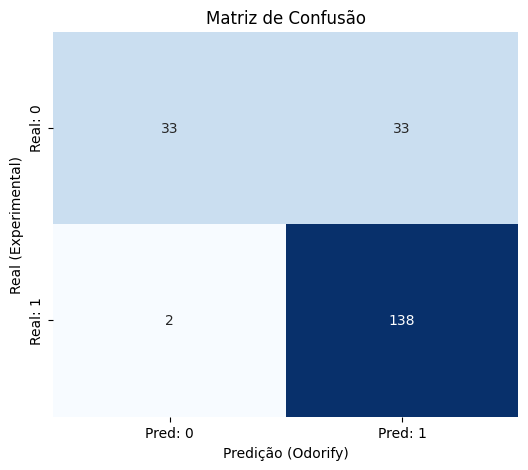

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, precision_score, recall_score, f1_score, confusion_matrix

# ==========================================
# 1. CONFIGURAÇÃO DO ARQUIVO
# ==========================================
# Cole o caminho do seu arquivo aqui:
file_path = '/content/moleculas_unicas.csv'

# ==========================================
# 2. CARREGAMENTO INTELIGENTE
# ==========================================
try:
    if file_path.endswith('.csv'):
        # Tenta detectar separador automaticamente (sep=None)
        df = pd.read_csv(file_path, sep=None, engine='python')
    else:
        df = pd.read_excel(file_path)

    print(f"Arquivo carregado! Dimensões: {df.shape}")
    print("Colunas encontradas:", df.columns.tolist())
    print("\n--- VISUALIZAÇÃO DAS PRIMEIRAS 5 LINHAS ---")
    display(df.head()) # Mostra a tabela para você conferir
    print("-------------------------------------------\n")

    # VERIFICAÇÃO DE SEGURANÇA
    if df.shape[1] < 3:
        print(f"⛔ ERRO CRÍTICO: O Pandas encontrou apenas {df.shape[1]} colunas.")
        print("DICA: Se seus dados apareceram 'grudados' na visualização acima,")
        print("o problema é o separador do CSV.")
    else:
        # ==========================================
        # 3. SELEÇÃO DAS COLUNAS (Ajuste aqui se precisar)
        # ==========================================
        # Assume-se:
        # Coluna 0 (índice 0) = SMILES
        # Coluna 1 (índice 1) = Experimental
        # Coluna 2 (índice 2) = Predição Odorify

        y_true_raw = df.iloc[:, 1] # Pega a segunda coluna
        y_pred_raw = df.iloc[:, 2] # Pega a terceira coluna

        # Tratamento para garantir que são números
        y_true = pd.to_numeric(y_true_raw, errors='coerce').fillna(0).astype(int)
        y_pred = pd.to_numeric(y_pred_raw, errors='coerce').fillna(0).astype(int)

        # ==========================================
        # 4. CÁLCULO E PLOTAGEM
        # ==========================================
        bacc = balanced_accuracy_score(y_true, y_pred)
        mcc = matthews_corrcoef(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        print("="*40)
        print("RESULTADOS (EXPERIMENTAL vs ODORIFY)")
        print("="*40)
        print(f"Balanced Accuracy (BACC): {bacc:.4f}")
        print(f"Matthews Corr. Coeff. (MCC): {mcc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (Sensitivity): {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("="*40)

        # Matriz de Confusão
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred: 0', 'Pred: 1'],
                    yticklabels=['Real: 0', 'Real: 1'])
        plt.title('Matriz de Confusão')
        plt.ylabel('Real (Experimental)')
        plt.xlabel('Predição (Odorify)')
        plt.show()

except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado em: {file_path}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")